In [20]:
# functions from compute-prot-mh-another-way
# (use for ORF prediction)

dna_to_aa={'TTT':'F','TTC':'F', 'TTA':'L','TTG':'L',
                'TCT':'S','TCC':'S','TCA':'S','TCG':'S',
                'TAT':'Y','TAC':'Y', 'TAA':'*','TAG':'*','TGA':'*',
                'TGT':'C','TGC':'C', 'TGG':'W',
                'CTT':'L','CTC':'L','CTA':'L','CTG':'L',
                'CCT':'P','CCC':'P','CCA':'P','CCG':'P',
                'CAT':'H','CAC':'H', 'CAA':'Q','CAG':'Q',
                'CGT':'R','CGC':'R','CGA':'R','CGG':'R',
                'ATT':'I','ATC':'I','ATA':'I', 'ATG':'M',
                'ACT':'T','ACC':'T','ACA':'T','ACG':'T',
                'AAT':'N','AAC':'N', 'AAA':'K','AAG':'K',
                'AGT':'S','AGC':'S', 'AGA':'R','AGG':'R',
                'GTT':'V','GTC':'V','GTA':'V','GTG':'V',
                'GCT':'A','GCC':'A','GCA':'A','GCG':'A',
                'GAT':'D','GAC':'D', 'GAA':'E','GAG':'E',
                'GGT':'G','GGC':'G','GGA':'G','GGG':'G'}


__complementTranslation = { "A": "T", "C": "G", "G": "C", "T": "A", "N": "N" }
def complement(s):
    """
    Return complement of 's'.
    """
    c = "".join(__complementTranslation[n] for n in s)
    return c

def reverse(s):
    """
    Return reverse of 's'.
    """
    r = "".join(reversed(s))
    return r

def peptides(seq, start):
    for i in range(start, len(seq), 3):
        yield dna_to_aa.get(seq[i:i+3], "X")
        
def translate(seq):
    for i in range(3):
        pep = peptides(seq, i)
        yield "".join(pep)

    revcomp = reverse(complement((seq)))
    for i in range(3):
        pep = peptides(revcomp, i)
        yield "".join(pep)

def kmers(seq, k):
    for start in range(len(seq) - k + 1):
        yield seq[start:start + k]
        



    


keep_longest=True
#remove=False        
def check_stop_codons(seq, keep_longest=True):
    seq = seq.strip('*') # strip stop codons from beginning or end of sequence
    #print (seq)
    stops = seq.count('*') # count stop codos
    #print (stops)
    #if stops > 0: # truncate? look for largest intervening sequence? remove entirely?
        #if len(split_seqs) > 2: # Could use this to check for too many intervening stop codons (what would be #?)
        #    return ''
    if keep_longest:
        split_seqs = seq.split('*')
        longest = max(split_seqs, key=len)         
        return longest
        #elif remove:
            #return ''
    
def check_length(seq,orfLength):
    if len(seq) >= orfLength:
        return True
    else:
        return False

#Transcript="ATGCGAGTGTTG"
Transcript="ATGCGAGTGTTGAAGTTCGGCGGTACATCAGTGGCAAATGCAGAACGTTTTCTGCGGGTTGCCGATATTCTGGAAAGCAATGCCAGGCAGGGGCAGGTGGCCACCGTCCTCTCTGCCCCCGCCAAAATCACCAACCACCTGGTGGCGATGATTGAAAAAACCATTAGCGGCCAGGATGCTTTACCCAATATCAGCGATGCCGAACGTATTTTTGCCGAACTTCTGACGGGACTCGCCGCCGCCCAGCCGGGATTCCCGCTGGCGCAATTGAAAACTTTCGTCGACCAGGAATTTGCCCAAATAAAACATGTCCTGCATGGCATTAGTTTGTTAGGGCAGTGCCCGGATAGCATTAACGCTGCGCTGATTTGCCGTGGCGAGAAAATGTCGATCGCCATTATGGCCGGCGTATTAGAAGCGCGCGGTCACAACGTTACCGTTATCGATCCGGTCGAAAAACTGCTGGCAGTGGGGCATTACCTCGAATCTACTGTCGATATTGCAGAGTCCACCCGCCGTATTGCGGCAAGTCGTATTCCGGCTGATCACATGGTGCTGATGGCAGGTTTCACCGCCGGTAATGAAAAAGGCGAACTGGTGGTACTTGGACGCAACGGTTCCGACTACTCCGCGGCGGTGCTGGCTGCCTGTTTACGCGCCGATTGTTGCGAGATTTGGACGGACGTTGACGGGGTATATACCTGCGACCCGCGTCAGGTGCCCGATGCGAGGTTGTTGAAATCGATGTCCTACCAGGAAGCGATGGAGCTTTCCTACTTCGGCGCTAAAGTTCTTCACCCCCGCACCATTACCCCCATCGCCCAGTTCCAGATCCCTTGCCTGATTAAAAATACCGGAAATCCTCAAGCTCCAGGTACGCTCATTGGTGCCAGTCGTGATGAAGACGAATTACCGGTCAAGGGCATTTCCAATCTGAATAATATGGCAATGTTCAGCGTTTCCGGCCCGGGGATGAAAGGAATGGTCGGCATGGCGGCGCGCGTCTTTGCTGCAATGTCACGCGCCCGTATTTCCGTGGTGCTGATTACGCAATCATCTTCCGAATACAGTATCAGTTTCTGCGTTCCGCAAAGCGACTGTGTGCGAGCTGAACGGGCAATGCAGGAAGAGTTCTACCTGGAACTGAAAGAAGGCTTACTGGAGCCGCTGGCGGTGACGGAACGGCTGGCCATTATCTCGGTGGTAGGTGATGGTATGCGCACCTTGCGTGGGATCTCGGCGAAATTCTTTGCCGCGCTGGCCCGCGCCAATATCAACATTGTCGCTATTGCTCAGGGATCTTCTGAACGCTCAATCTCTGTCGTGGTAAATAACGATGATGCGACCACTGGCGTGCGCGTTACTCATCAGATGCTGTTCAATACCGATCAGGTTATCGAAGTGTTTGTGATTGGCGTCGGTGGCGTTGGCGGTGCGCTGCTGGAGCAACTGAAGCGTCAGCAAAGCTGGTTGAAGAATAAACATATCGACTTACGTGTCTGCGGTGTTGCTAACTCGAAGGCTCTGCTCACCAATGTGCATGGCCTAAATCTGGAAAACTGGCAGGAAGAACTGGCGCAAGCCAAAGAGCCGTTTAATCTCGGGCGCTTAATTCGCCTCGTGAAAGAATATCATCTGCTGAACCCGGTCATTGTTGACTGCACCTCCAGCCAGGCAGTGGCGGATCAATATGCCGACTTCCTGCGCGAAGGTTTCCACGTTGTCACGCCGAACAAAAAGGCCAACACCTCGTCGATGGATTACTACCATCTGTTGCGTCATGCGGCTGAAAAATCGCGGCGTAAATTCCTCTATGACACCAACGTTGGGGCTGGATTACCGGTTATTGAGAACCTGCAAAATCTGCTCAATGCTGGTGATGAATTGATGAAGTTCTCCGGCATTCTTTCAGGTTCGCTTTCTTATATCTTCGGCAAGTTAGACGAAGGCATGAGTTTCTCCGAGGCGACTACGCTGGCGCGGGAAATGGGTTATACCGAACCGGATCCGCGAGATGATCTTTCTGGTATGGATGTAGCGCGTAAACTATTAATTCTCGCTCGTGAAACGGGACGTGAACTGGAGCTGGCGGATATTGAAATTGAACCTGTGCTGCCCGCAGAGTTTAACGCTGAGGGTGATGTTGCCGCTTTTATGGCGAATCTGTCACAGCTCGACGATCTCTTTGCCGCGCGCGTGGCGAAGGCCCGTGATGAAGGAAAAGTTTTGCGCTATGTTGGCAATATTGATGAAGATGGCGTCTGCCGCGTGAAGATTGCCGAAGTGGATGGTAATGATCCGCTGTTCAAAGTGAAAAATGGCGAAAACGCCCTGGCCTTTTATAGCCACTATTATCAGCCGCTGCCGTTGGTGCTGCGCGGATATGGTGCGGGCAATGACGTTACCGCTGCCGGTGTCTTTGCCGATCTGCTACGTACCCTCTCATGGAAGTTAGGAGTCTGA"
pep = translate(Transcript) 
longest_list=[]
for p in pep:
    #print (p)
    longest=check_stop_codons(p)
    longest_list.append(longest)
ORF=max(longest_list, key=len)
#print (ORF)
#print (longest_list)

#print (list(pep))
# print the ORFs to check
#print ()
#longest=check_stop_codons(peptides)

#print(longest)
    


    



MRVLKFGGTSVANAERFLRVADILESNARQGQVATVLSAPAKITNHLVAMIEKTISGQDALPNISDAERIFAELLTGLAAAQPGFPLAQLKTFVDQEFAQIKHVLHGISLLGQCPDSINAALICRGEKMSIAIMAGVLEARGHNVTVIDPVEKLLAVGHYLESTVDIAESTRRIAASRIPADHMVLMAGFTAGNEKGELVVLGRNGSDYSAAVLAACLRADCCEIWTDVDGVYTCDPRQVPDARLLKSMSYQEAMELSYFGAKVLHPRTITPIAQFQIPCLIKNTGNPQAPGTLIGASRDEDELPVKGISNLNNMAMFSVSGPGMKGMVGMAARVFAAMSRARISVVLITQSSSEYSISFCVPQSDCVRAERAMQEEFYLELKEGLLEPLAVTERLAIISVVGDGMRTLRGISAKFFAALARANINIVAIAQGSSERSISVVVNNDDATTGVRVTHQMLFNTDQVIEVFVIGVGGVGGALLEQLKRQQSWLKNKHIDLRVCGVANSKALLTNVHGLNLENWQEELAQAKEPFNLGRLIRLVKEYHLLNPVIVDCTSSQAVADQYADFLREGFHVVTPNKKANTSSMDYYHLLRHAAEKSRRKFLYDTNVGAGLPVIENLQNLLNAGDELMKFSGILSGSLSYIFGKLDEGMSFSEATTLAREMGYTEPDPRDDLSGMDVARKLLILARETGRELELADIEIEPVLPAEFNAEGDVAAFMANLSQLDDLFAARVAKARDEGKVLRYVGNIDEDGVCRVKIAEVDGNDPLFKVKNGENALAFYSHYYQPLPLVLRGYGAGNDVTAAGVFADLLRTLSWKLGV


In [44]:
import sourmash_lib
Protein="MRVLKFGGTSVANAERFLRVADILESNARQGQVATVLSAPAKITNHLVAVIEKTISGQDALPNISDAERIFAELLTGLAAAQPGFPLAQLKTFVDQEFAQIKHVLHGISLLGQCPDSINAALICRGEKVSIAIVAGVLEARGHNVTVIDPVEKLLAVGHYLESTVDIAESTRRIAASRIPADHVVLVAGFTAGNEKGELVVLGRNGSDYSAAVLAACLRADCCEIWTDVDGVYTCDPRQVPDARLLKSVSYQEAVELSYFGAKVLHPRTITPIAQFQIPCLIKNTGNPQAPGTLIGASRDEDELPVKGISNLNNVAVFSVSGPGVKGVVGVAARVFAAVSRARISVVLITQSSSEYSISFCVPQSDCVRAERAVQEEFYLELKEGLLEPLAVTERLAIISVVGDGVRTLRGISAKFFAALARANINIVAIAQGSSERSISVVVNNDDATTGVRVTHQVLFNTDQVIEVFVIGVGGVGGALLEQLKRQQSWLKNKHIDLRVCGVANSKALLTNVHGLNLENWQEELAQAKEPFNLGRLIRLVKEYHLLNPVIVDCTSSQAVADQYADFLREGFHVVTPNKKANTSSVDYYHLLRHAAEKSRRKFLYDTNVGAGLPVIENLQNLLNAGDELVKFSGILSGSLSYIFGKLDEGVSFSEATTLAREVGYTEPDPRDDLSGVDVARKLLILARETGRELELADIEIEPVLPAEFNAEGDVAAFVANLSQLDDLFAARVAKARDEGKVLRYVGNIDEDGVCRVKIAEVDGNDPLFKVKNGENALAFYSHYYQPLPLVLRGYGAGNDVTAAGVFADLLRTLSWKLGV"
#Example="ATGCGAGTG"
Transcripts=ORF
#print (Protein)
Results_non=open("Results_ORF_Transcripts_position_Jaccard_one_nonsynonmymous.txt","w")
Results_syn=open("Results_ORF_Transcripts_position_Jaccard_one_synonmymous.txt","w")
###############################################################################
#Mutation by position, one mutation each time, nonsynonmymous. 
###############################################################################

for i in range(0,len(Transcripts)):
    sequence=Transcripts
    if i==0:
        sequence='T'+ Transcripts[1:]
    else:
        if Transcripts[i]=='T':
            beginning=Transcripts[0:i]
            first=beginning+'G'
            sequence=first+Transcripts[i+1:]
        else:
            beginning=sequence[0:i]
            #print (beginning)
            first=beginning+'T'
            sequence=first+Transcripts[i+1:]
    #print (sequence)
    E1 = sourmash_lib.MinHash(n=20, ksize=21, is_protein=True)
    E1.add_protein(Protein)
    E2 = sourmash_lib.MinHash(n=20, ksize=21, is_protein=True)
    E2.add_protein(sequence)
    Jaccard=round(E1.jaccard(E2), 2)
    Results_non.write(str(Jaccard)+"\n")
###############################################################################
#Mutation by position, one mutation each time, synonmyous. 
###############################################################################

for i in range(0,len(Transcripts)):
    beginning1=Transcripts[0:i]
    #print (beginning)
    first1=beginning1+'T'
    sequence1=first1+Transcripts[i+1:]
    #print (sequence)
    E11 = sourmash_lib.MinHash(n=20, ksize=21, is_protein=True)
    E11.add_protein(Protein)
    E22 = sourmash_lib.MinHash(n=20, ksize=21, is_protein=True)
    E22.add_protein(sequence1)
    Jaccard1=round(E11.jaccard(E22), 2)
    Results_syn.write(str(Jaccard1)+"\n")
    #print (sequence1)
Results_non.close()
Results_syn.close()

#ATGCGAGTG



TRVLKFGGTSVANAERFLRVADILESNARQGQVATVLSAPAKITNHLVAMIEKTISGQDALPNISDAERIFAELLTGLAAAQPGFPLAQLKTFVDQEFAQIKHVLHGISLLGQCPDSINAALICRGEKMSIAIMAGVLEARGHNVTVIDPVEKLLAVGHYLESTVDIAESTRRIAASRIPADHMVLMAGFTAGNEKGELVVLGRNGSDYSAAVLAACLRADCCEIWTDVDGVYTCDPRQVPDARLLKSMSYQEAMELSYFGAKVLHPRTITPIAQFQIPCLIKNTGNPQAPGTLIGASRDEDELPVKGISNLNNMAMFSVSGPGMKGMVGMAARVFAAMSRARISVVLITQSSSEYSISFCVPQSDCVRAERAMQEEFYLELKEGLLEPLAVTERLAIISVVGDGMRTLRGISAKFFAALARANINIVAIAQGSSERSISVVVNNDDATTGVRVTHQMLFNTDQVIEVFVIGVGGVGGALLEQLKRQQSWLKNKHIDLRVCGVANSKALLTNVHGLNLENWQEELAQAKEPFNLGRLIRLVKEYHLLNPVIVDCTSSQAVADQYADFLREGFHVVTPNKKANTSSMDYYHLLRHAAEKSRRKFLYDTNVGAGLPVIENLQNLLNAGDELMKFSGILSGSLSYIFGKLDEGMSFSEATTLAREMGYTEPDPRDDLSGMDVARKLLILARETGRELELADIEIEPVLPAEFNAEGDVAAFMANLSQLDDLFAARVAKARDEGKVLRYVGNIDEDGVCRVKIAEVDGNDPLFKVKNGENALAFYSHYYQPLPLVLRGYGAGNDVTAAGVFADLLRTLSWKLGV
MTVLKFGGTSVANAERFLRVADILESNARQGQVATVLSAPAKITNHLVAMIEKTISGQDALPNISDAERIFAELLTGLAAAQPGFPLAQLKTFVDQEFAQIKHVLHGISLLGQCPDSINAALICRGEKMSIAIMAGVLEARGHNVTVIDPVEKLLAVGHYLESTVDIAESTRRIAASRI

MRVLKFGGTSVANAERFLRVADILESNARQGQVATVLSAPAKITNHLVAMIEKTISGQDALPNISDAERIFAELLTGLAAAQPGFPLAQLKTFVDQEFAQIKHVLHGISLLGQCPDSINAALICRGEKMSIAIMAGVLEARGHNVTVIDPVEKLLAVGHYLESTVDIAESTRRIAASRIPADHMVLMAGFTAGNEKGELVVLGRNGSDYSAAVLAACLRADCCEIWTDVDGVYTCDPRQVPDARLLKSMSYQEAMELSYFGAKVLHPRTITPIAQFQIPCLIKNTGNPQAPGTLIGASRDEDELPVKGISNLNNMAMFSVSGPGMKGMVGMAARVFAAMSRARISVVLITQSSSEYSISFCVPQSDCVRAERAMQEEFYLELKEGLLEPLAVTERLAIISVVGDGMRTLRGISAKFFAALARANINIVAITQGSSERSISVVVNNDDATTGVRVTHQMLFNTDQVIEVFVIGVGGVGGALLEQLKRQQSWLKNKHIDLRVCGVANSKALLTNVHGLNLENWQEELAQAKEPFNLGRLIRLVKEYHLLNPVIVDCTSSQAVADQYADFLREGFHVVTPNKKANTSSMDYYHLLRHAAEKSRRKFLYDTNVGAGLPVIENLQNLLNAGDELMKFSGILSGSLSYIFGKLDEGMSFSEATTLAREMGYTEPDPRDDLSGMDVARKLLILARETGRELELADIEIEPVLPAEFNAEGDVAAFMANLSQLDDLFAARVAKARDEGKVLRYVGNIDEDGVCRVKIAEVDGNDPLFKVKNGENALAFYSHYYQPLPLVLRGYGAGNDVTAAGVFADLLRTLSWKLGV
MRVLKFGGTSVANAERFLRVADILESNARQGQVATVLSAPAKITNHLVAMIEKTISGQDALPNISDAERIFAELLTGLAAAQPGFPLAQLKTFVDQEFAQIKHVLHGISLLGQCPDSINAALICRGEKMSIAIMAGVLEARGHNVTVIDPVEKLLAVGHYLESTVDIAESTRRIAASRI

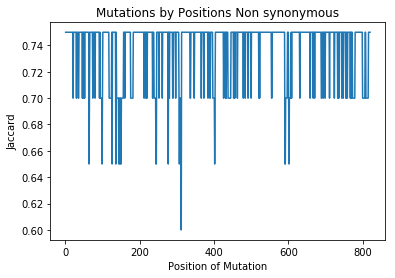

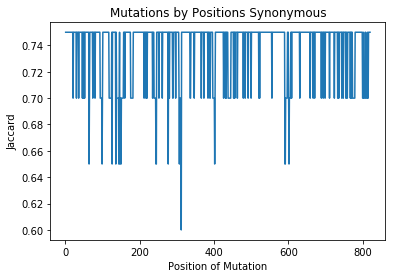

In [45]:
with open("Results_ORF_Transcripts_position_Jaccard_one_nonsynonmymous.txt") as f:
    contents = f.readlines()
    #print (content)
    contents = [x.strip() for x in contents]
    contents= [float(x) for x in contents]
    position_mutations=[]
    for i in range(1,len(Transcripts)+1):
        #print (i)
        position_mutations.append(i)
    #print (len(position_mutations))
    #print (len(contents))
    
with open("Results_ORF_Transcripts_position_Jaccard_one_synonmymous.txt") as f:
    contents1 = f.readlines()
    #print (content)
    contents1 = [x.strip() for x in contents1]
    contents1 = [float(x) for x in contents1]
    position_mutations1=[]
    for i in range(1,len(Transcripts)+1):
        #print (i)
        position_mutations1.append(i) 
    #print (contents1)
    #print(position_mutations1)
import matplotlib.pyplot as plt
plt.plot(position_mutations,contents)
plt.ylabel('Jaccard')
plt.xlabel('Position of Mutation')
plt.title("Mutations by Positions Non synonymous")
plt.show()
plt.plot(position_mutations1,contents1)
plt.ylabel('Jaccard')
plt.xlabel('Position of Mutation')
plt.title("Mutations by Positions Synonymous")
plt.show()

In [50]:
Results_non1=open("Results_ORF_Transcripts_number_Jaccard_one_nonsynonmymous.txt","w")
Results_syn1=open("Results_ORF_Transcripts_number_Jaccard_one_synonmymous.txt","w")
Protein="MRVLKFGGTSVANAERFLRVADILESNARQGQVATVLSAPAKITNHLVAVIEKTISGQDALPNISDAERIFAELLTGLAAAQPGFPLAQLKTFVDQEFAQIKHVLHGISLLGQCPDSINAALICRGEKVSIAIVAGVLEARGHNVTVIDPVEKLLAVGHYLESTVDIAESTRRIAASRIPADHVVLVAGFTAGNEKGELVVLGRNGSDYSAAVLAACLRADCCEIWTDVDGVYTCDPRQVPDARLLKSVSYQEAVELSYFGAKVLHPRTITPIAQFQIPCLIKNTGNPQAPGTLIGASRDEDELPVKGISNLNNVAVFSVSGPGVKGVVGVAARVFAAVSRARISVVLITQSSSEYSISFCVPQSDCVRAERAVQEEFYLELKEGLLEPLAVTERLAIISVVGDGVRTLRGISAKFFAALARANINIVAIAQGSSERSISVVVNNDDATTGVRVTHQVLFNTDQVIEVFVIGVGGVGGALLEQLKRQQSWLKNKHIDLRVCGVANSKALLTNVHGLNLENWQEELAQAKEPFNLGRLIRLVKEYHLLNPVIVDCTSSQAVADQYADFLREGFHVVTPNKKANTSSVDYYHLLRHAAEKSRRKFLYDTNVGAGLPVIENLQNLLNAGDELVKFSGILSGSLSYIFGKLDEGVSFSEATTLAREVGYTEPDPRDDLSGVDVARKLLILARETGRELELADIEIEPVLPAEFNAEGDVAAFVANLSQLDDLFAARVAKARDEGKVLRYVGNIDEDGVCRVKIAEVDGNDPLFKVKNGENALAFYSHYYQPLPLVLRGYGAGNDVTAAGVFADLLRTLSWKLGV"
#Transcripts="ATGCGAGTGTTGAAGTTCGGCGGTACATCAGTGGCAAATGCAGAACGTTTTCTGCGGGTTGCCGATATTCTGGAAAGCAATGCCAGGCAGGGGCAGGTGGCCACCGTCCTCTCTGCCCCCGCCAAAATCACCAACCACCTGGTGGCGATGATTGAAAAAACCATTAGCGGCCAGGATGCTTTACCCAATATCAGCGATGCCGAACGTATTTTTGCCGAACTTCTGACGGGACTCGCCGCCGCCCAGCCGGGATTCCCGCTGGCGCAATTGAAAACTTTCGTCGACCAGGAATTTGCCCAAATAAAACATGTCCTGCATGGCATTAGTTTGTTAGGGCAGTGCCCGGATAGCATTAACGCTGCGCTGATTTGCCGTGGCGAGAAAATGTCGATCGCCATTATGGCCGGCGTATTAGAAGCGCGCGGTCACAACGTTACCGTTATCGATCCGGTCGAAAAACTGCTGGCAGTGGGGCATTACCTCGAATCTACTGTCGATATTGCAGAGTCCACCCGCCGTATTGCGGCAAGTCGTATTCCGGCTGATCACATGGTGCTGATGGCAGGTTTCACCGCCGGTAATGAAAAAGGCGAACTGGTGGTACTTGGACGCAACGGTTCCGACTACTCCGCGGCGGTGCTGGCTGCCTGTTTACGCGCCGATTGTTGCGAGATTTGGACGGACGTTGACGGGGTATATACCTGCGACCCGCGTCAGGTGCCCGATGCGAGGTTGTTGAAATCGATGTCCTACCAGGAAGCGATGGAGCTTTCCTACTTCGGCGCTAAAGTTCTTCACCCCCGCACCATTACCCCCATCGCCCAGTTCCAGATCCCTTGCCTGATTAAAAATACCGGAAATCCTCAAGCTCCAGGTACGCTCATTGGTGCCAGTCGTGATGAAGACGAATTACCGGTCAAGGGCATTTCCAATCTGAATAATATGGCAATGTTCAGCGTTTCCGGCCCGGGGATGAAAGGAATGGTCGGCATGGCGGCGCGCGTCTTTGCTGCAATGTCACGCGCCCGTATTTCCGTGGTGCTGATTACGCAATCATCTTCCGAATACAGTATCAGTTTCTGCGTTCCGCAAAGCGACTGTGTGCGAGCTGAACGGGCAATGCAGGAAGAGTTCTACCTGGAACTGAAAGAAGGCTTACTGGAGCCGCTGGCGGTGACGGAACGGCTGGCCATTATCTCGGTGGTAGGTGATGGTATGCGCACCTTGCGTGGGATCTCGGCGAAATTCTTTGCCGCGCTGGCCCGCGCCAATATCAACATTGTCGCTATTGCTCAGGGATCTTCTGAACGCTCAATCTCTGTCGTGGTAAATAACGATGATGCGACCACTGGCGTGCGCGTTACTCATCAGATGCTGTTCAATACCGATCAGGTTATCGAAGTGTTTGTGATTGGCGTCGGTGGCGTTGGCGGTGCGCTGCTGGAGCAACTGAAGCGTCAGCAAAGCTGGTTGAAGAATAAACATATCGACTTACGTGTCTGCGGTGTTGCTAACTCGAAGGCTCTGCTCACCAATGTGCATGGCCTAAATCTGGAAAACTGGCAGGAAGAACTGGCGCAAGCCAAAGAGCCGTTTAATCTCGGGCGCTTAATTCGCCTCGTGAAAGAATATCATCTGCTGAACCCGGTCATTGTTGACTGCACCTCCAGCCAGGCAGTGGCGGATCAATATGCCGACTTCCTGCGCGAAGGTTTCCACGTTGTCACGCCGAACAAAAAGGCCAACACCTCGTCGATGGATTACTACCATCTGTTGCGTCATGCGGCTGAAAAATCGCGGCGTAAATTCCTCTATGACACCAACGTTGGGGCTGGATTACCGGTTATTGAGAACCTGCAAAATCTGCTCAATGCTGGTGATGAATTGATGAAGTTCTCCGGCATTCTTTCAGGTTCGCTTTCTTATATCTTCGGCAAGTTAGACGAAGGCATGAGTTTCTCCGAGGCGACTACGCTGGCGCGGGAAATGGGTTATACCGAACCGGATCCGCGAGATGATCTTTCTGGTATGGATGTAGCGCGTAAACTATTAATTCTCGCTCGTGAAACGGGACGTGAACTGGAGCTGGCGGATATTGAAATTGAACCTGTGCTGCCCGCAGAGTTTAACGCTGAGGGTGATGTTGCCGCTTTTATGGCGAATCTGTCACAGCTCGACGATCTCTTTGCCGCGCGCGTGGCGAAGGCCCGTGATGAAGGAAAAGTTTTGCGCTATGTTGGCAATATTGATGAAGATGGCGTCTGCCGCGTGAAGATTGCCGAAGTGGATGGTAATGATCCGCTGTTCAAAGTGAAAAATGGCGAAAACGCCCTGGCCTTTTATAGCCACTATTATCAGCCGCTGCCGTTGGTGCTGCGCGGATATGGTGCGGGCAATGACGTTACCGCTGCCGGTGTCTTTGCCGATCTGCTACGTACCCTCTCATGGAAGTTAGGAGTCTGA"
Transcripts=ORF
sequence1=Transcripts
###############################################################################
#Mutation by number non synonmyous 
###############################################################################
for i in range(0,len(Transcripts)):
    if i==0:
        sequence11='T'+ Transcripts[1:]
    else:
        if Transcripts[i]=='T':
            beginning11=sequence11[0:i]
            first11=beginning11+'G'
            sequence11=first11+sequence11[i+1:]
        else:
            beginning11=sequence11[0:i]
            #print (beginning)
            first11=beginning11+'T'
            sequence11=first11+sequence11[i+1:]
    #print (sequence11)
    E111 = sourmash_lib.MinHash(n=20, ksize=21, is_protein=True)
    E111.add_protein(Protein)
    E222 = sourmash_lib.MinHash(n=20, ksize=21, is_protein=True)
    E222.add_protein(sequence11)
    Jaccard11=round(E111.jaccard(E222), 2)
    Results_non1.write(str(Jaccard11)+"\n")
###############################################################################
#Mutation by number, one mutation each time, synonmyous. 
###############################################################################
#Transcripts="ATGCGAGTGTTGAAGTTCGGCGGTACATCAGTGGCAAATGCAGAACGTTTTCTGCGGGTTGCCGATATTCTGGAAAGCAATGCCAGGCAGGGGCAGGTGGCCACCGTCCTCTCTGCCCCCGCCAAAATCACCAACCACCTGGTGGCGATGATTGAAAAAACCATTAGCGGCCAGGATGCTTTACCCAATATCAGCGATGCCGAACGTATTTTTGCCGAACTTCTGACGGGACTCGCCGCCGCCCAGCCGGGATTCCCGCTGGCGCAATTGAAAACTTTCGTCGACCAGGAATTTGCCCAAATAAAACATGTCCTGCATGGCATTAGTTTGTTAGGGCAGTGCCCGGATAGCATTAACGCTGCGCTGATTTGCCGTGGCGAGAAAATGTCGATCGCCATTATGGCCGGCGTATTAGAAGCGCGCGGTCACAACGTTACCGTTATCGATCCGGTCGAAAAACTGCTGGCAGTGGGGCATTACCTCGAATCTACTGTCGATATTGCAGAGTCCACCCGCCGTATTGCGGCAAGTCGTATTCCGGCTGATCACATGGTGCTGATGGCAGGTTTCACCGCCGGTAATGAAAAAGGCGAACTGGTGGTACTTGGACGCAACGGTTCCGACTACTCCGCGGCGGTGCTGGCTGCCTGTTTACGCGCCGATTGTTGCGAGATTTGGACGGACGTTGACGGGGTATATACCTGCGACCCGCGTCAGGTGCCCGATGCGAGGTTGTTGAAATCGATGTCCTACCAGGAAGCGATGGAGCTTTCCTACTTCGGCGCTAAAGTTCTTCACCCCCGCACCATTACCCCCATCGCCCAGTTCCAGATCCCTTGCCTGATTAAAAATACCGGAAATCCTCAAGCTCCAGGTACGCTCATTGGTGCCAGTCGTGATGAAGACGAATTACCGGTCAAGGGCATTTCCAATCTGAATAATATGGCAATGTTCAGCGTTTCCGGCCCGGGGATGAAAGGAATGGTCGGCATGGCGGCGCGCGTCTTTGCTGCAATGTCACGCGCCCGTATTTCCGTGGTGCTGATTACGCAATCATCTTCCGAATACAGTATCAGTTTCTGCGTTCCGCAAAGCGACTGTGTGCGAGCTGAACGGGCAATGCAGGAAGAGTTCTACCTGGAACTGAAAGAAGGCTTACTGGAGCCGCTGGCGGTGACGGAACGGCTGGCCATTATCTCGGTGGTAGGTGATGGTATGCGCACCTTGCGTGGGATCTCGGCGAAATTCTTTGCCGCGCTGGCCCGCGCCAATATCAACATTGTCGCTATTGCTCAGGGATCTTCTGAACGCTCAATCTCTGTCGTGGTAAATAACGATGATGCGACCACTGGCGTGCGCGTTACTCATCAGATGCTGTTCAATACCGATCAGGTTATCGAAGTGTTTGTGATTGGCGTCGGTGGCGTTGGCGGTGCGCTGCTGGAGCAACTGAAGCGTCAGCAAAGCTGGTTGAAGAATAAACATATCGACTTACGTGTCTGCGGTGTTGCTAACTCGAAGGCTCTGCTCACCAATGTGCATGGCCTAAATCTGGAAAACTGGCAGGAAGAACTGGCGCAAGCCAAAGAGCCGTTTAATCTCGGGCGCTTAATTCGCCTCGTGAAAGAATATCATCTGCTGAACCCGGTCATTGTTGACTGCACCTCCAGCCAGGCAGTGGCGGATCAATATGCCGACTTCCTGCGCGAAGGTTTCCACGTTGTCACGCCGAACAAAAAGGCCAACACCTCGTCGATGGATTACTACCATCTGTTGCGTCATGCGGCTGAAAAATCGCGGCGTAAATTCCTCTATGACACCAACGTTGGGGCTGGATTACCGGTTATTGAGAACCTGCAAAATCTGCTCAATGCTGGTGATGAATTGATGAAGTTCTCCGGCATTCTTTCAGGTTCGCTTTCTTATATCTTCGGCAAGTTAGACGAAGGCATGAGTTTCTCCGAGGCGACTACGCTGGCGCGGGAAATGGGTTATACCGAACCGGATCCGCGAGATGATCTTTCTGGTATGGATGTAGCGCGTAAACTATTAATTCTCGCTCGTGAAACGGGACGTGAACTGGAGCTGGCGGATATTGAAATTGAACCTGTGCTGCCCGCAGAGTTTAACGCTGAGGGTGATGTTGCCGCTTTTATGGCGAATCTGTCACAGCTCGACGATCTCTTTGCCGCGCGCGTGGCGAAGGCCCGTGATGAAGGAAAAGTTTTGCGCTATGTTGGCAATATTGATGAAGATGGCGTCTGCCGCGTGAAGATTGCCGAAGTGGATGGTAATGATCCGCTGTTCAAAGTGAAAAATGGCGAAAACGCCCTGGCCTTTTATAGCCACTATTATCAGCCGCTGCCGTTGGTGCTGCGCGGATATGGTGCGGGCAATGACGTTACCGCTGCCGGTGTCTTTGCCGATCTGCTACGTACCCTCTCATGGAAGTTAGGAGTCTGA"
Transcripts=ORF
sequence111=Transcripts
for i in range(0,len(Transcripts)):
    beginning111=sequence111[0:i]
    #print (beginning)
    first111=beginning111+'T'
    sequence111=first111+sequence111[i+1:]
    #print (sequence111)
    E1111 = sourmash_lib.MinHash(n=20, ksize=21, is_protein=True)
    E1111.add_protein(Protein)
    E2222 = sourmash_lib.MinHash(n=20, ksize=21, is_protein=True)
    E2222.add_protein(sequence111)
    Jaccard111=round(E1111.jaccard(E2222), 2)
    Results_syn1.write(str(Jaccard111)+"\n")
Results_non1.close()
Results_syn1.close() 

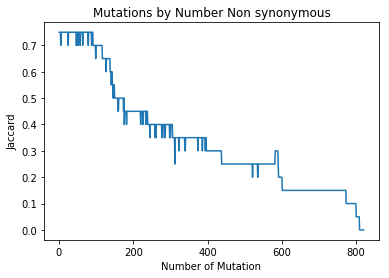

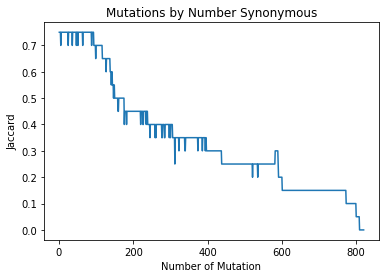

In [51]:
with open("Results_ORF_Transcripts_number_Jaccard_one_nonsynonmymous.txt") as f:
    #print (Transcripts)
    contents11 = f.readlines()
    #print (content)
    contents11 = [x.strip() for x in contents11]
    contents11= [float(x) for x in contents11]
    number_mutations=[]
    for i in range(1,len(Transcripts)+1):
        #print (i)
        number_mutations.append(i)
    #print (len(contents11))
    #print (len(number_mutations))
with open("Results_ORF_Transcripts_number_Jaccard_one_synonmymous.txt") as f:
    contents111 = f.readlines()
    #print(contents111)
    #print (content)
    contents111 = [x.strip() for x in contents111]
    contents111= [float(x) for x in contents111]
    number_mutations1=[]
    for i in range(1,len(Transcripts)+1):
        #print (i)
        number_mutations1.append(i)
    #print (len(contents11))
    #print (len(contents111))
import matplotlib.pyplot as plt
plt.plot(number_mutations,contents11)
plt.ylabel('Jaccard')
plt.xlabel('Number of Mutation')
plt.title("Mutations by Number Non synonymous")
plt.show()
plt.plot(number_mutations1,contents111)
plt.ylabel('Jaccard')
plt.xlabel('Number of Mutation')
plt.title("Mutations by Number Synonymous")
plt.show()
#ATGCGAGTG